In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
PATH = 'drive/MyDrive/enpm808w-datasets/'


Mounted at /content/drive/


In [4]:
bwt = pd.read_csv(PATH + 'supermarket_sales.csv')
bwt.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Using the head() to show the number of rows in the data. in this case i have 5 rows.
this data shows a list of customer's sales which indicates their customer member card type, product line having their respective unit prices and quantities each customer has purchased. it also  indicates the cities they're located in. 

In [5]:
bwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Here i noticed that there are no null values in my dataset.

In [6]:
null_rows = bwt[bwt.isnull().any(axis=1)] #will return rows that have a null value in any column
null_rows.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


i can confirm this using the isnull method which will return any row in the data with a nulll value

In [7]:
bwt.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


I noticed that the gross margin percentage in the dataset seem to be repeated. so i decided to check for unique values

In [8]:
bwt['gross margin percentage'].unique()

array([4.76190476])

all the values are the same. its best to drop this column

In [9]:
bwt=bwt.drop(['gross margin percentage'], axis =1)

In [10]:
bwt.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [11]:
print(bwt.shape)


(1000, 16)


Printing the dataset and then checking for the number of males and females that has purchased any of the products in the market

In [12]:
bwt['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

this indicates that the males have purchased less than the females with a difference of only 2. so if i confirm this by plotting a graph for both genders

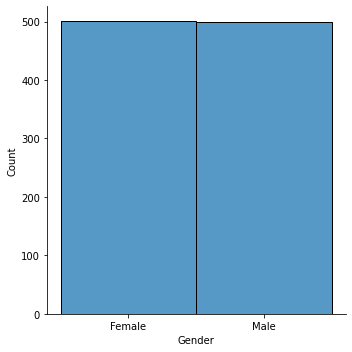

In [13]:
ax1=sns.displot(x='Gender',data=bwt)

you will notice a little gap between males and females

i want to make comparisons between the number of males that purchased a partiicular product line and also for females as well. in order to do this i need to make use of a function where the values of males and females are numerical ie 1 for males and 0 for females parsed through a dataframe using the get_dummy function and then i'll plot them in a graph;

In [14]:
gender_d = pd.get_dummies(bwt['Gender'])
gender_d.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


so now joining the original data with the gender function datagframe

In [15]:
bwt =pd.concat([bwt,gender_d], axis=1)
bwt.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,0,1


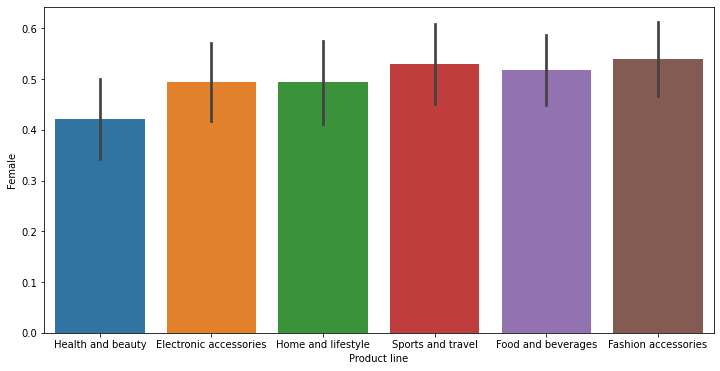

In [16]:
 plt.figure(figsize=(12,6))
 sns.barplot(x='Product line', y='Female', data=bwt)

we can see that **fashion accessories** are being purchased more by Females(say more than 50%) and less for health and beauty(more than 40%)

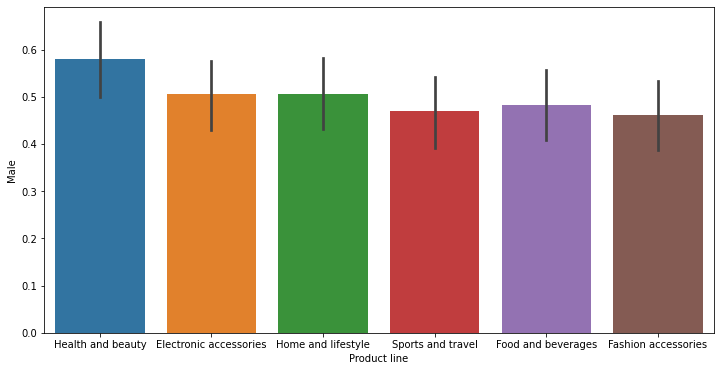

In [17]:
 plt.figure(figsize=(12,6))
 sns.barplot(x='Product line', y='Male', data=bwt)

plotting the same graph for Males. the **health and beauty product** line are purchased more by Males(also more than 50%)

**Plotting Customers against cities**

In [18]:
place_d = pd.DataFrame(bwt['City'].value_counts())
place_d

,City
Yangon,340
Mandalay,332
Naypyitaw,328


this indicates that a lot of customers from Yangon city are going to the market to purchase products more. if we confirm from the graph

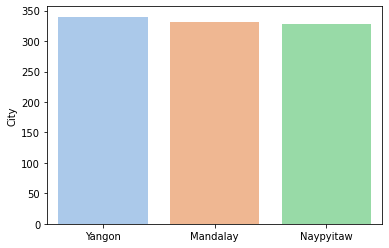

In [19]:
sns.barplot(x=place_d.index, y=place_d['City'], palette ='pastel')

if we were to check for the payment count and then plotting the graph


In [20]:
payment_d=pd.DataFrame(bwt['Payment'].value_counts())
payment_d

,Payment
Ewallet,345
Cash,344
Credit card,311


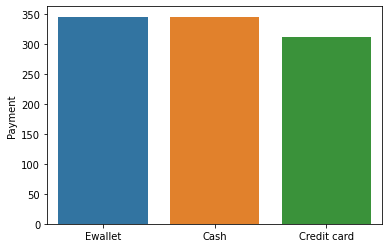

In [21]:
sns.barplot(x=payment_d.index,y=payment_d.Payment)

its shown here that Ewallet is most preferred choice for most customers

In [22]:
gross_d=pd.DataFrame(bwt['gross income'].value_counts())
gross_d

,gross income
10.3260,2
4.4640,2
4.1540,2
9.0045,2
22.4280,2
...,...
7.2135,1
19.5895,1
26.9150,1
24.2575,1


Getting Gross Income graph for each product line

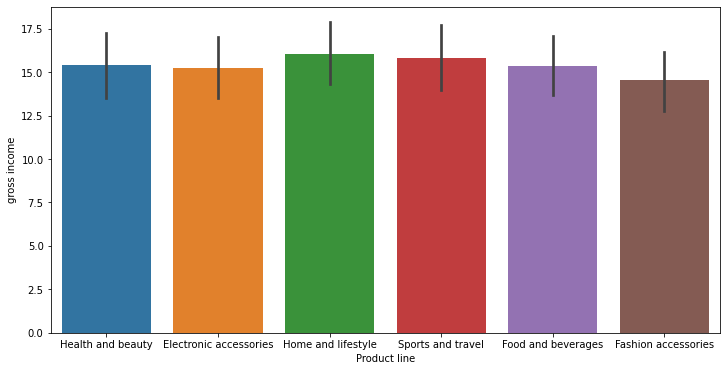

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=bwt['Product line'], y =bwt['gross income'])

it shows that the **Home and Lifestyle** has the highest gross income which means more profits are gained from this in the product line whille **fashion accessories** seems to be the lowest which means a lot of marketing strategies might be needed for the product to sell more

([<matplotlib.axis.XTick at 0x7f6cdde4de90>,
 <a list of 11 Text major ticklabel objects>)

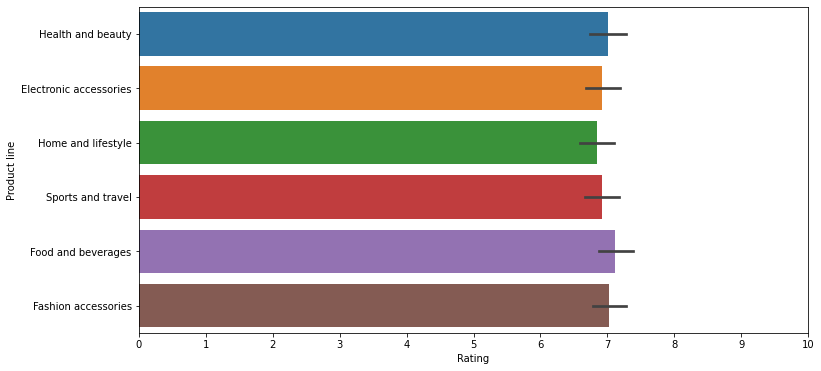

In [24]:
xrating=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.barplot(y=bwt['Product line'], x=bwt['Rating'])
plt.xticks(xrating)

this indicated that **food and beverages** has the most average rating


determining **Total Bill in each product line**



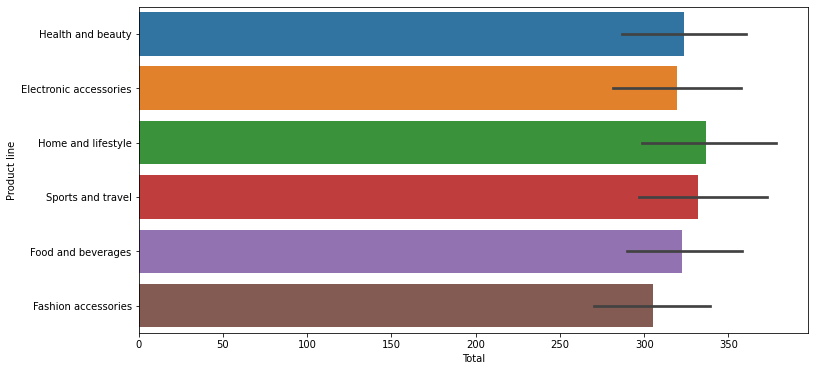

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=bwt['Total'],y=bwt['Product line'])

**home and lifestyle** is earning the most profit thats why its having the highest total bill which is the average selling price in the product line

**visualizing the Quantity column**




In [26]:
quantity_d=pd.DataFrame(bwt['Quantity'].value_counts())
quantity_d

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7f6cddd62ed0>,
 <a list of 10 Text major ticklabel objects>)

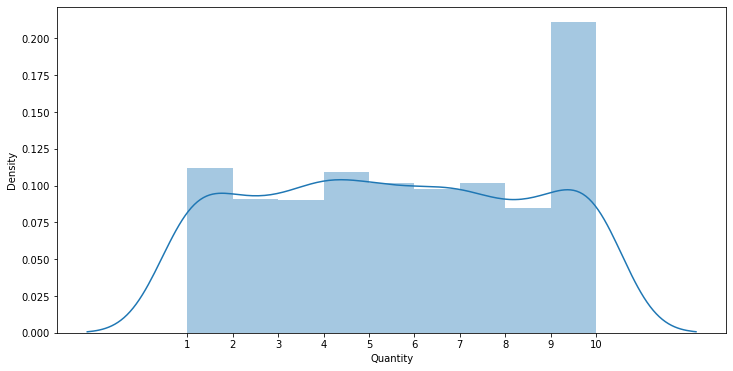

In [27]:
xdata=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.distplot(bwt['Quantity'])
plt.xticks(xdata)

here it indicates that most customers usually purchase 9-10 quantity of the product line

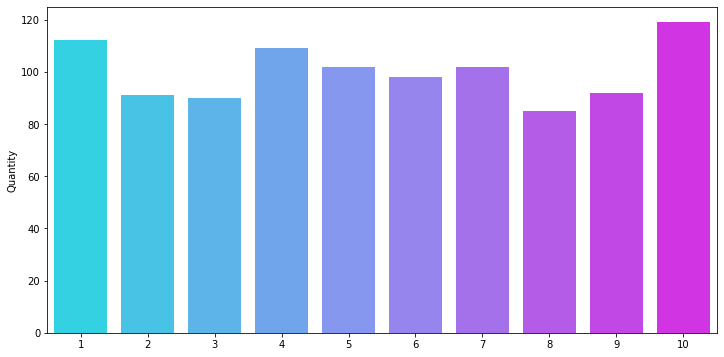

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=quantity_d.index, y=quantity_d['Quantity'], palette="cool")

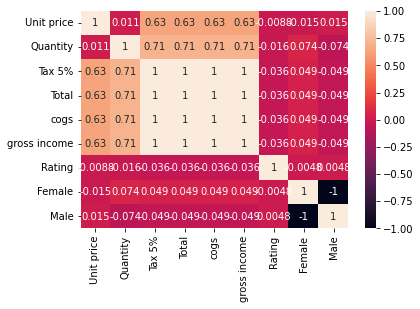

In [29]:
sns.heatmap(bwt.corr(),annot=True)

i'm trying to check for the correlation between the columns. we can see that the male and female columns do not have any correlation the dark parts show no correlation. there's no much correlations between ratings and cost of goods

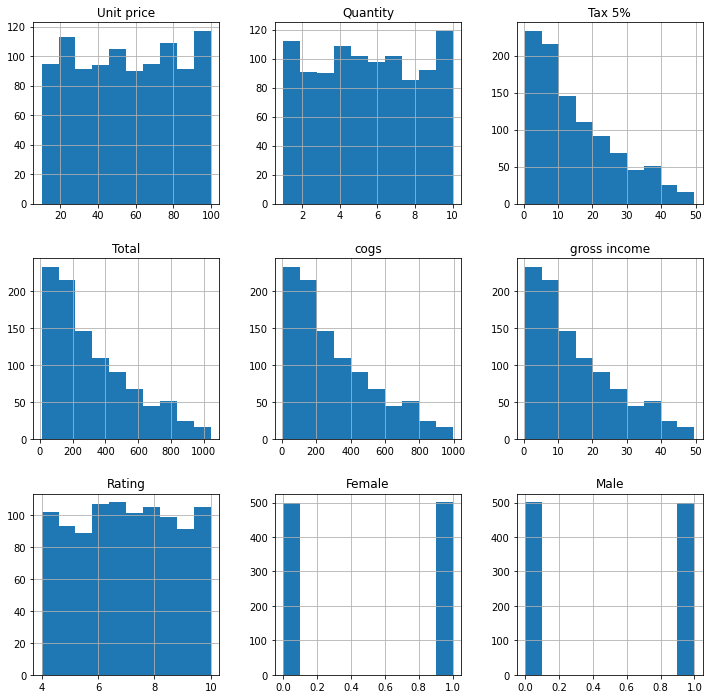

In [30]:
bwt.hist(figsize=(12,12))
plt.show()

i also noticed that the 'tax 5%' and 'gross income' columns are literally having the same values. i could either leave both of them or drop one of them 

In [31]:
bwt['Tax 5%'].unique()==bwt['gross income'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

i'm dropping the 'tax 5%', date and time. i'm dropping the date and time because i feel they're not needed in comaparison with other columns in the dataset

In [32]:
bwt=bwt.drop(['Tax 5%','Date','Time'],axis=1)
bwt.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,76.40,3.8200,9.6,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,604.17,30.2085,5.3,0,1


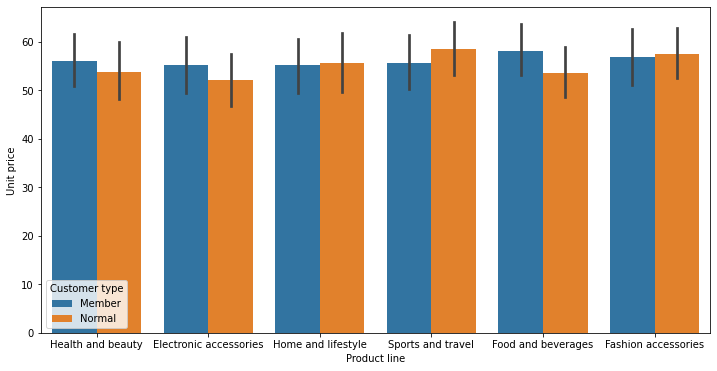

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line', y='Unit price', hue='Customer type', data=bwt)

In [34]:
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='Gender', y='Branch', hue='Product line', data=bwt)